5-8-19: 01-data_processing.ipynb is for initial data loading, image scaling/resizing, and vectorizing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from pathlib import Path
import seaborn as sns
import numpy as np
import glob #good for 
import cv2

import io, time
tm = time.time()

%load_ext autotime

In [2]:
date="05092019" #defining the date for saving files later
wd= os.getcwd() #'/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling'

time: 1.16 ms


In [3]:
def gather_image_files():
    global wd
    allyes=glob.glob("../data/raw/yes/"+'*.[pjJ][npP][gG]') #grabs all jpg and png files
    allno=glob.glob("../data/raw/no/"+'*.[pjJ][npP][gG]')
    return(allyes,allno)

time: 2.68 ms


In [4]:
def max_dimensions():
    """use to determine the max height and width of images to determine final image size to standardize to.
    the following functions will be tuned assuming this has been run and interpreted"""
    
    global allyes, allno
    #finding max dimensions
    dim_list=[]
    for i in range(0,len(allyes)):
        dim_list.append(cv2.imread(allyes[i]).shape)
    for i in range(0,len(allno)):
        dim_list.append(cv2.imread(allno[i]).shape)
    #dim_list
     
    largest_l=0 #longest height
    largest_w=0 #longst width
    i=0
    i_l=0 #index of tallest
    i_w=0 #index of widest
    for element in dim_list:
        if element[0]>largest_l:
            largest_l=element[0]
            i_l=i
        else: pass
        if element[1]>largest_w:
            largest_w=element[1]
            i_w=i
        else: pass
        i+=1
    
    return(largest_l, largest_w, i_l, i_w)


time: 39.5 ms


In [5]:
def img_std_size1(im, h=1500):

    h=h #desired size decided based on output from max_dimensions
    
    ##scaling a pictures smallest dimension to 1500
    old_size=im.shape[:2]
    
    scale_ratio=h/min(old_size)
    
    new_size = tuple([int(x*scale_ratio) for x in old_size])
    im = cv2.resize(im, (new_size[1], new_size[0]))
    
    #cropping the rescaled image to 1500x1500
    x1=int((im.shape[1]/2) -(h/2))
    y1=int((im.shape[0]/2) -(h/2))

    crop_img = im[y1:y1+h, x1:x1+h].copy() #the .copy() makes sure it doesn't change the image inline and saves it as new
    
    return(crop_img)


def img_std_size2(im, h=1500):
    'scale the largest to 1500 and add black background'
    from cv2 import copyMakeBorder
#     print("img size:", img.shape)
    
    h=h #desired size
    ##scaling a pictures smallest dimension to 1500
    old_size=im.shape[:2]

    ##scaling image down by factor of 1500/max dimension
    scale_ratio=h/max(old_size) #scale it up or down to max=1500
    new_size = tuple([int(x*scale_ratio) for x in old_size])
    im = cv2.resize(im, (new_size[1], new_size[0]))

    ###adding appropriate amount of boarder
    #dealing with odd numbers by adding a pixel on top or left
    i=0
    if im.shape[0] %2 ==1: #if number is odd
        i=1
    j=0
    if im.shape[1] %2 ==1: #if number is odd
        j=1
    
    top=int((1500-im.shape[0])/2)+i
    bottom=int((1500-im.shape[0])/2)
    left=int((1500-im.shape[1])/2)+j
    right=int((1500-im.shape[1])/2)

    color = [0, 0, 0]
    border_img=copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    return(border_img)

def master_img_scale(im):
    if max(im.shape)>1500:
        scaled_im = img_std_size1(im)
    else:
        scaled_im = img_std_size2(im)
    return(scaled_im)

time: 134 ms


In [11]:
def main():
    X=[]    #
    y=[]    #onehot encoded y label
    
    allyes,allno=gather_image_files()
    
    for myFile in allyes:
        image = cv2.imread(myFile)#, cv2.COLOR_BGR2RGB)
        scaled= master_img_scale(image)
        X.append (np.array(scaled))
        y.append([1., 0.])
    for myFile in allno:
        image = cv2.imread(myFile)#, cv2.COLOR_BGR2RGB)
        scaled= master_img_scale(image)
        X.append (np.array(scaled))
        y.append([0., 1.])

    X = np.array(X,dtype='float32')  / 255.0 #convert to np array and scale values to between 0-1.
    #X= X[:,:,:,0] #each rgb layer provides same info since it's greyscaled already
    y = np.array(y,dtype='float64') #as mnist
    
    return(X,y)


time: 15.9 ms


# gather X,y of all scaled images

In [12]:
X,y= main()

time: 24.8 s


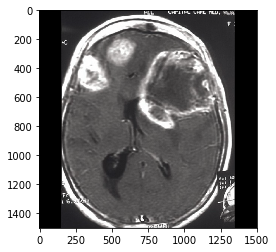

time: 420 ms


In [13]:
#test
plt.imshow(X[3])

# save/load

In [19]:

np.save(Path("../data/processed/%s_X.npy" %(date)),X)
np.save(Path("../data/processed/%s_y.npy" %(date)),y)

#can load with:
#X=np.load("../data/processed/%s_X.npy"%(date))
#y=np.load("../data/processed/%s_y.npy"%(date))

time: 27.4 s
